In [2]:
#Importando as bibliotecas necessárias
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [3]:
pib=pd.read_excel('gdp_per_year.xlsx') #PIB em dolares com inflacao ajustada 
agri_porc = pd.read_excel('AgriculturepforGDP.xlsx') #Porcentagem do PIB que corresponde à agricultura
hightech_export = pd.read_excel('high_tech_export.xlsx') #Porcentagem da comercialização de bens de manofatura que corresponde a bens hightech
populacao=pd.read_excel('population_total.xlsx') #População total de cada país
land_agri=pd.read_excel("agricultural_land_percent_of_land_area.xlsx") #Porcentagem correspondente a área disponível para plantio em cada país

In [6]:
pib_idx = pib.set_index('Country')
agri_idx = agri_porc.set_index("Country")
hightech_idx = hightech_export.set_index('Country')
populacao_idx= populacao.set_index("Country")
land_agri_idx = land_agri.set_index("country")

In [7]:
#Criando a coluna BRICS 
pib_idx["BRICS"] = 0
agri_idx["BRICS"] = 0
hightech_idx["BRICS"] = 0
land_agri_idx["BRICS"] = 0
#Criando o grupo que irá se repetir
brics =["Brazil", "China","India","South Africa", "Russia"]
#Mudando a coluna dos membros dos BRICS
pib_idx.loc[brics, "BRICS" ] = 1
agri_idx.loc[brics, "BRICS" ] = 1
hightech_idx.loc[brics, "BRICS" ] = 1

land_agri_idx.loc[brics, "BRICS" ] = 1

#democracia_idx.loc[democracia_idx["BRICS"] == 1]  teste

#Criando a coluna OCDE

pib_idx["OCDE"]=0
agri_idx["OCDE"] = 0
hightech_idx["OCDE"] = 0

#Criando o grupo que irá se repetir
ocde = [ "United States","United Kingdom", "Turkey", "Switzerland", "Sweden", "Spain", "Slovenia", "Slovak Republic", "Portugal", "Poland", "Norway", "New Zealand","Netherlands", "Mexico", "Luxembourg", "Lithuania", "Latvia", "Japan", "Italy", "Israel", "Ireland", "Iceland", "Hungary", "Greece", "Germany", "France", "Finland", "Estonia", "Denmark", "Czech Rep.", "Chile", "Canada", "Belgium", "Austria", "Australia"]
#Mudando a coluna dos membros da OCDE
pib_idx.loc[ocde,"OCDE"]=1
agri_idx.loc[brics, "OCDE" ] = 1
hightech_idx.loc[brics, "OCDE" ] = 1





C:\Users\luisf\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


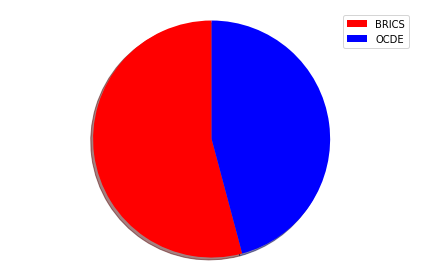

In [33]:
anos = np.arange(1987, 2011, 1)
a=land_agri_idx.loc[brics,anos].mean().mean()
b=land_agri_idx.loc[ocde,anos].mean().mean()
labels = ['BRICS', 'OCDE']
sizes = [a, b]
colors = ['red', 'blue']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [31]:
anos = np.arange(1987, 2011, 1)
#df = pd.DataFrame(land_agri_idx.loc[brics,anos].mean(), columns = ['Name', 'Age'])
#a=land_agri_idx.loc[brics,anos].mean().mean()
#b=land_agri_idx.loc[brics,anos].mean().mean()
b
a

49.71625000000001

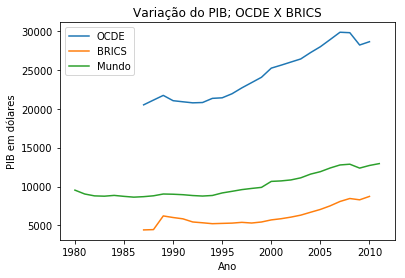

In [47]:
#Como foi a variação do PIB de 1987 até 2011 (ano mais recente do DataFrame)

#Criando variação de tempo desejada
anos = np.arange(1987, 2011, 1)

#Criando variável que contém a média dos PIBS a cada ano
pib_ocde = pib_idx.loc[pib_idx.OCDE ==1].loc[:, anos]

pib_brics =pib_idx.loc[pib_idx.BRICS==1].loc[:,anos]

#Plotando o gráfico

fig, ax1 = plt.subplots()

#ax1.subplot(111)
ax1.plot(pib_ocde.mean(), label="OCDE")
ax1.plot(pib_brics.mean(),label="BRICS")
ax1.plot(pib.mean(), label="Mundo")
ax1.legend()



plt.ylabel("PIB em dólares")
plt.xlabel("Ano")
plt.title("Variação do PIB; OCDE X BRICS")
plt.show()

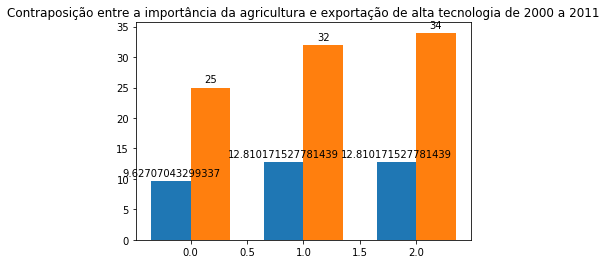

In [52]:
#Comparação tech e porcentagem pib

tech_mundi11 = hightech_idx.loc[:,["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"]].mean().mean()
tech_ocde11 = hightech_idx.loc[hightech_idx.OCDE==1].loc[:,["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"]].mean().mean()
tech_brics11 = hightech_idx.loc[hightech_idx.BRICS==1].loc[:,["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"]].mean().mean()


tech_mundi10 = float(tech_mundi11)
tech_ocde10 = float(tech_ocde11)
tech_brics10 = float(tech_brics11)



labels = ['Mundo', 'OCDE', 'BRICS']
men_means = [tech_mundi10, tech_ocde10, tech_brics10,]
women_means = [25, 32, 34]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label=' investimento em Technologie')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Scores')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()


plt.title('Contraposição entre a importância da agricultura e exportação de alta tecnologia de 2000 a 2011')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

#fig.tight_layout()

plt.show()





#tech_mundi10.plot(kind='bar', color=('blue', 'red'), legend=False)
#tech_ocde01.plot(kind='bar', color=('blue', 'red'), legend=False)
#tech_brics10.plot(kind='bar', color=('blue', 'red'), legend=False)
#plt.show()